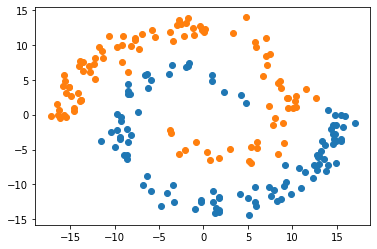

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

N = 100
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

X = np.append(x_a, np.zeros((N,1)), axis=1)
Y = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(X, Y, axis=0)
np.random.shuffle(res)

np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')
plt.scatter(x_a[:,0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

In [2]:
print(X)

[[  7.39542788 -10.44805455   0.        ]
 [ -7.40367152   0.46504549   0.        ]
 [  1.02608379 -10.97716379   0.        ]
 [ -9.41364983  -3.13718613   0.        ]
 [ -6.84551013 -10.06498027   0.        ]
 [ 14.96332735  -1.50237451   0.        ]
 [ -8.25218187   2.97442793   0.        ]
 [ -8.48758632   2.93340293   0.        ]
 [  9.21013266  -7.19141372   0.        ]
 [ 14.59032245  -2.70741798   0.        ]
 [ 14.03244787  -7.24447449   0.        ]
 [  4.12616256 -11.37791878   0.        ]
 [ 13.20475221  -5.22127262   0.        ]
 [  5.84500376 -10.45334285   0.        ]
 [ 14.59844694  -4.18459396   0.        ]
 [ -0.9910264  -13.56219383   0.        ]
 [ -8.60896927  -1.98380819   0.        ]
 [  2.34502145   3.33780085   0.        ]
 [ -9.92315521  -4.63258139   0.        ]
 [  1.07702422 -12.60287461   0.        ]
 [ 12.7833256   -5.82458266   0.        ]
 [-10.3860975   -2.43827261   0.        ]
 [ 12.44731579  -7.17360976   0.        ]
 [ 14.64379136  -3.53036799   0.  

In [3]:
print (Y )

[[ -9.05573583  11.2579112    1.        ]
 [  7.38486568   1.31982314   1.        ]
 [ -1.76946716  13.88425077   1.        ]
 [ 10.35010661   2.03085512   1.        ]
 [  5.91516387   9.71658447   1.        ]
 [-15.66669726  -0.09377359   1.        ]
 [  8.94820941  -1.22271444   1.        ]
 [  7.85033141  -1.41463356   1.        ]
 [ -9.11208174   7.51961866   1.        ]
 [-15.44361281   3.15007023   1.        ]
 [-12.19084333   8.14627205   1.        ]
 [ -2.9339718   12.90064061   1.        ]
 [-15.71373462   5.7435603    1.        ]
 [ -7.72208384  10.78429535   1.        ]
 [-13.78783514   2.18123857   1.        ]
 [  0.09570991  11.94913069   1.        ]
 [  9.50974105   0.98119914   1.        ]
 [ -2.75147045  -5.59454857   1.        ]
 [  8.5630654    4.83260597   1.        ]
 [ -0.20556917  12.24424656   1.        ]
 [-13.49576652   6.27115506   1.        ]
 [  9.49096975   2.39998036   1.        ]
 [-13.91357029   7.73399084   1.        ]
 [-14.53600633   0.55213592   1.  

In [4]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
   # def tanh(self, x, der=False):
        #if(der==True):
            #return(1-(x**2))
        #return np.tanh(x)
        
    def relu(self, x):
        if(x>0):
            return x
        return (0.01*x)   
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.relu(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.relu(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.relu(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.relu(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

In [5]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

ValueError: shapes (100,3) and (2,10) not aligned: 3 (dim 1) != 2 (dim 0)